In [10]:
import pomegranate as pg
import skfuzzy

fo = pg.DiscreteDistribution({'family out':0.15,'family home':0.85})
bp = pg.DiscreteDistribution({'bowel problem':0.01,'no bowel problem':0.99})
print(bp)

{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "bowel problem" : 0.01,
            "no bowel problem" : 0.99
        }
    ],
    "frozen" : false
}


In [12]:
lo = pg.ConditionalProbabilityTable(
    [['family home', 'light off', 0.95],
     ['family home', 'light on', 0.95],
     ['family out', 'light off', 0.95],
     ['family out', 'light on', 0.95]] ,[fo]
    
)

do = pg.ConditionalProbabilityTable([['light']])


<>:4: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:4: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
C:\Users\jjy\AppData\Local\Temp\ipykernel_7600\1023626077.py:4: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  ['family home', 'light off', 0.95]
C:\Users\jjy\AppData\Local\Temp\ipykernel_7600\1023626077.py:4: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  ['family home', 'light off', 0.95]
C:\Users\jjy\AppData\Local\Temp\ipykernel_7600\1023626077.py:4: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  ['family home', 'light off', 0.95]


TypeError: list indices must be integers or slices, not tuple

In [17]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jul 22 00:11:51 2023

@author: Francisco
"""

import pomegranate as pg


#section 3.1.1
fo = pg.DiscreteDistribution({'family out': 0.15, 'family home': 0.85})
bp = pg.DiscreteDistribution({'bowel problem': 0.01, 'no bowel problem': 0.99})

#section 3.1.2
lo = pg.ConditionalProbabilityTable(
        [[ 'family home', 'light off', 0.95 ],
         [ 'family home', 'light on', 0.05 ],
         [ 'family out', 'light off', 0.4 ],
         [ 'family out', 'light on', 0.6 ]],[fo]) 

do = pg.ConditionalProbabilityTable(
        [[ 'family home', 'no bowel problem', 'dog out', 0.3 ],
         [ 'family home', 'bowel problem', 'dog out', 0.97 ],
         [ 'family out', 'no bowel problem', 'dog out', 0.9 ],
         [ 'family out', 'bowel problem', 'dog out', 0.99 ],
         [ 'family home', 'no bowel problem', 'dog in', 0.7 ],
         [ 'family home', 'bowel problem', 'dog in', 0.03 ],
         [ 'family out', 'no bowel problem', 'dog in', 0.1 ],
         [ 'family out', 'bowel problem', 'dog in', 0.01 ]],[fo,bp]) 

hb = pg.ConditionalProbabilityTable(
        [[ 'dog in', 'no hear bark', 0.99 ],
         [ 'dog in', 'hear bark', 0.01 ],
         [ 'dog out', 'no hear bark', 0.3 ],
         [ 'dog out', 'hear bark', 0.7 ]],[do]) 

#section 3.1.3
model = pg.BayesianNetwork("MyBN")

#section 3.1.4
FO = pg.State(fo, name="FO")
BP = pg.State(bp, name="BP")
LO = pg.State(lo, name="LO")
DO = pg.State(do, name="DO")
HB = pg.State(hb, name="HB")

model.add_states(FO, BP, LO, DO, HB)

#section 3.1.5
model.add_edge(FO, LO)
model.add_edge(FO, DO)
model.add_edge(BP, DO)
model.add_edge(DO, HB)

#section 3.1.6
model.bake()

#section 3.1.7
#P(~FO,BP,~LO,DO,HB)
print(model.probability([["family home", "bowel problem", "light off", "dog out", "hear bark"]]))

#P(DO|BP)
print(model.predict_proba([{'BP': 'bowel problem'}])[0][3].parameters[0]['dog out'])
print(model.predict_proba([{'BP': 'bowel problem'}])[0][3])
#P(~BP|~DO)
print(model.predict_proba([{'DO': 'dog out'},{'BP': 'bowel problem'}])[0][1].parameters[0]['no bowel problem'])

0.0054829250000000005
0.9729999999999995
{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "dog in" : 0.027000000000000406,
            "dog out" : 0.9729999999999995
        }
    ],
    "frozen" : false
}
0.9754187403683389


: 

87.02380952380955
10.090909090909088


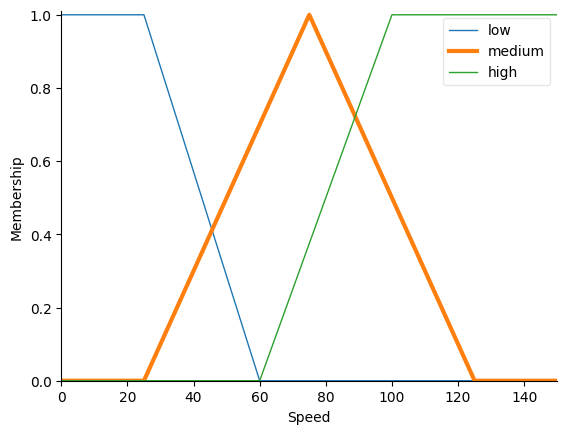

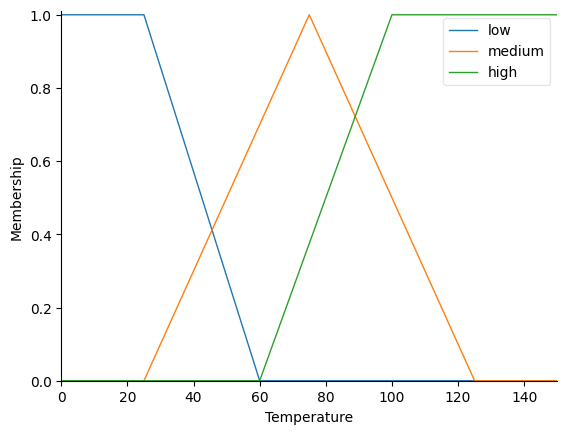

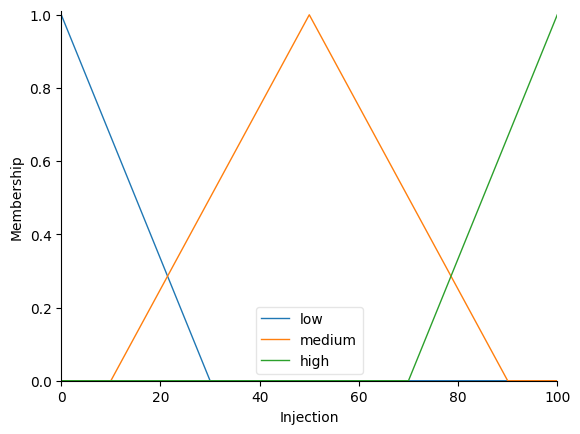

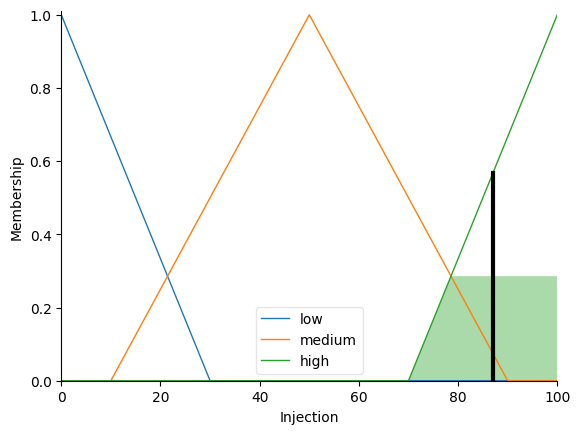

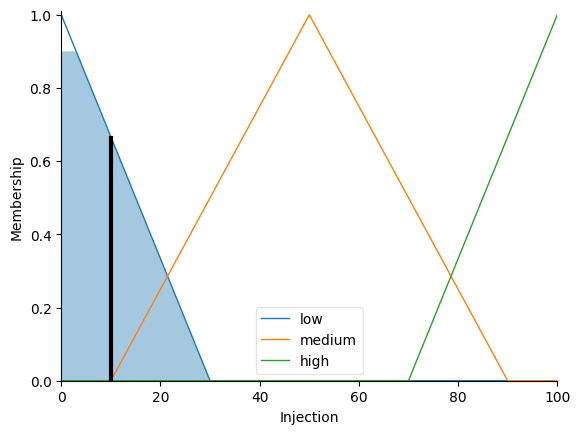

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 20 22:32:52 2023

@author: Francisco
"""

import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl


#section 4.1.1
speed = ctrl.Antecedent(np.arange(0, 151, 1), 'Speed')
temperature = ctrl.Antecedent(np.arange(0, 151, 1), 'Temperature')
injection = ctrl.Consequent(np.arange(0, 101, 1), 'Injection', defuzzify_method='centroid')

#section 4.1.2
speed['low'] = fuzz.trapmf(speed.universe, [0, 0, 25, 60])
speed['medium'] = fuzz.trimf(speed.universe, [25, 75, 125])
speed['high'] = fuzz.trapmf(speed.universe, [60, 100, 150, 150])

temperature['low'] = fuzz.trapmf(temperature.universe, [0, 0, 25, 60])
temperature['medium'] = fuzz.trimf(temperature.universe, [25, 75, 125])
temperature['high'] = fuzz.trapmf(temperature.universe, [60, 100, 150, 150])

injection['low'] = fuzz.trimf(injection.universe, [0, 0, 30])
injection['medium'] = fuzz.trimf(injection.universe, [10, 50, 90])
injection['high'] = fuzz.trimf(injection.universe, [70, 100, 100])

#section 4.1.3
speed['medium'].view()
temperature.view()
injection.view()

#section 4.1.4 rules definition
rule1 = ctrl.Rule(speed['medium'] & temperature['high'], injection['low']) #rule6
rule2 = ctrl.Rule(speed['low'] & temperature['low'], injection['high']) #rule1
rule3 = ctrl.Rule(speed['high'] & temperature['medium'], injection['low']) #rule8

#section 4.1.7
# rule1 = ctrl.Rule(speed['low'] & temperature['low'], injection['high'])
# rule2 = ctrl.Rule(speed['low'] & temperature['medium'], injection['high'])
# rule3 = ctrl.Rule(speed['low'] & temperature['high'], injection['medium'])

# rule4 = ctrl.Rule(speed['medium'] & temperature['low'], injection['high'])
# rule5 = ctrl.Rule(speed['medium'] & temperature['medium'], injection['medium'])
# rule6 = ctrl.Rule(speed['medium'] & temperature['high'], injection['low'])

# rule7 = ctrl.Rule(speed['high'] & temperature['low'], injection['medium'])
# rule8 = ctrl.Rule(speed['high'] & temperature['medium'], injection['low'])
# rule9 = ctrl.Rule(speed['high'] & temperature['high'], injection['low'])

#section 4.1.5 create controller and control simulator
injection_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
# Uncomment for section 4.1.7
# injection_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

injection_sim = ctrl.ControlSystemSimulation(injection_ctrl)

#section 4.1.6
injection_sim.input['Speed'] = 50
injection_sim.input['Temperature'] = 10
injection_sim.compute()

# Results and visualization.
print(injection_sim.output['Injection'])
injection.view(sim=injection_sim)

injection_sim.input['Speed'] = 70
injection_sim.input['Temperature'] = 100
injection_sim.compute()

print(injection_sim.output['Injection'])
injection.view(sim=injection_sim)


#section 4.1.8

# upsampled = np.linspace(0, 150, 16)
# x, y = np.meshgrid(upsampled, upsampled)
# z = np.zeros_like(x)

# #collect injections for the control surface
# for i in range(15):
#     for j in range(15):
#         injection_sim.input['Speed'] = x[i, j]
#         injection_sim.input['Temperature'] = y[i, j]
#         injection_sim.compute()
#         z[i, j] = injection_sim.output['Injection']

# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
#                        linewidth=0.4, antialiased=True)

# ax.view_init(20, 100)

